In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [5]:
df_test = pd.read_csv(r'//content//test_data.csv', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv(r'//content//train_data.csv', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name' , 'confession']

In [6]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [7]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          3669 non-null   int64 
 1   movie_name  3669 non-null   object
 2   confession  3669 non-null   object
dtypes: int64(1), object(2)
memory usage: 86.1+ KB


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          2109 non-null   int64 
 1   movie_name  2109 non-null   object
 2   category    2109 non-null   object
 3   confession  2109 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.0+ KB


In [10]:
df_train.describe()

,SN
count,2109.000000
mean,1056.000000
std,608.960179
min,2.000000
25%,529.000000
50%,1056.000000
75%,1583.000000
max,2110.000000


In [11]:
df_test.describe()

,SN
count,3669.000000
mean,1836.000000
std,1059.293397
min,2.000000
25%,919.000000
50%,1836.000000
75%,2753.000000
max,3670.000000


In [12]:
df_test.isnull().sum()

,0
SN,0
movie_name,0
confession,0


In [13]:
df_train.isnull().sum()

,0
SN,0
movie_name,0
category,0
confession,0


In [14]:
df_train.count()

,0
SN,2109
movie_name,2109
category,2109
confession,2109


In [15]:
df_test.count()

,0
SN,3669
movie_name,3669
confession,3669


In [16]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [17]:
df_train.loc[0]

,0
SN,2
movie_name,Cupid (1997)
category,thriller
confession,A brother and sister with a past incestuous r...


In [18]:
df_test.shape

(3669, 3)

In [19]:
df_train.shape

(2109, 4)

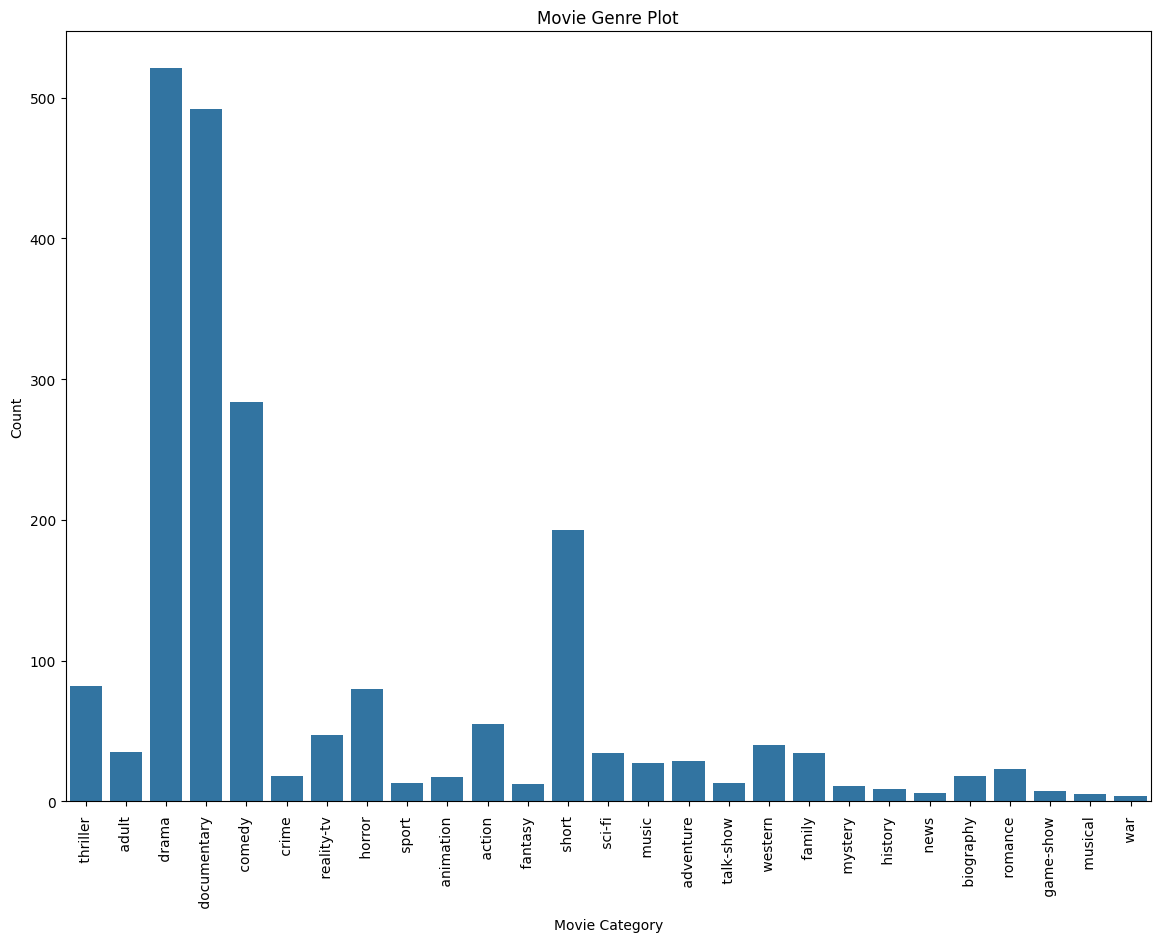

In [20]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

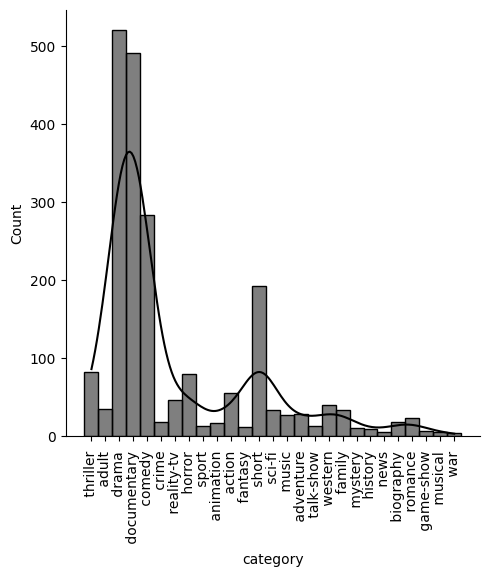

In [21]:
sns.displot(df_train.category, kde =True, color = "black")
plt.xticks(rotation=90);

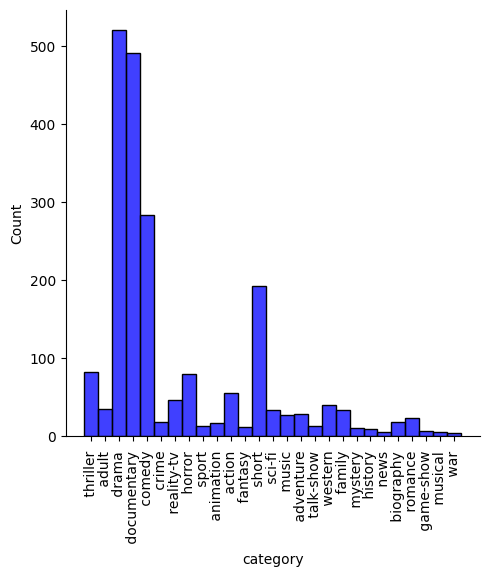

In [22]:
sns.displot(df_train.category, kde=False, color = "blue")
plt.xticks(rotation=90);

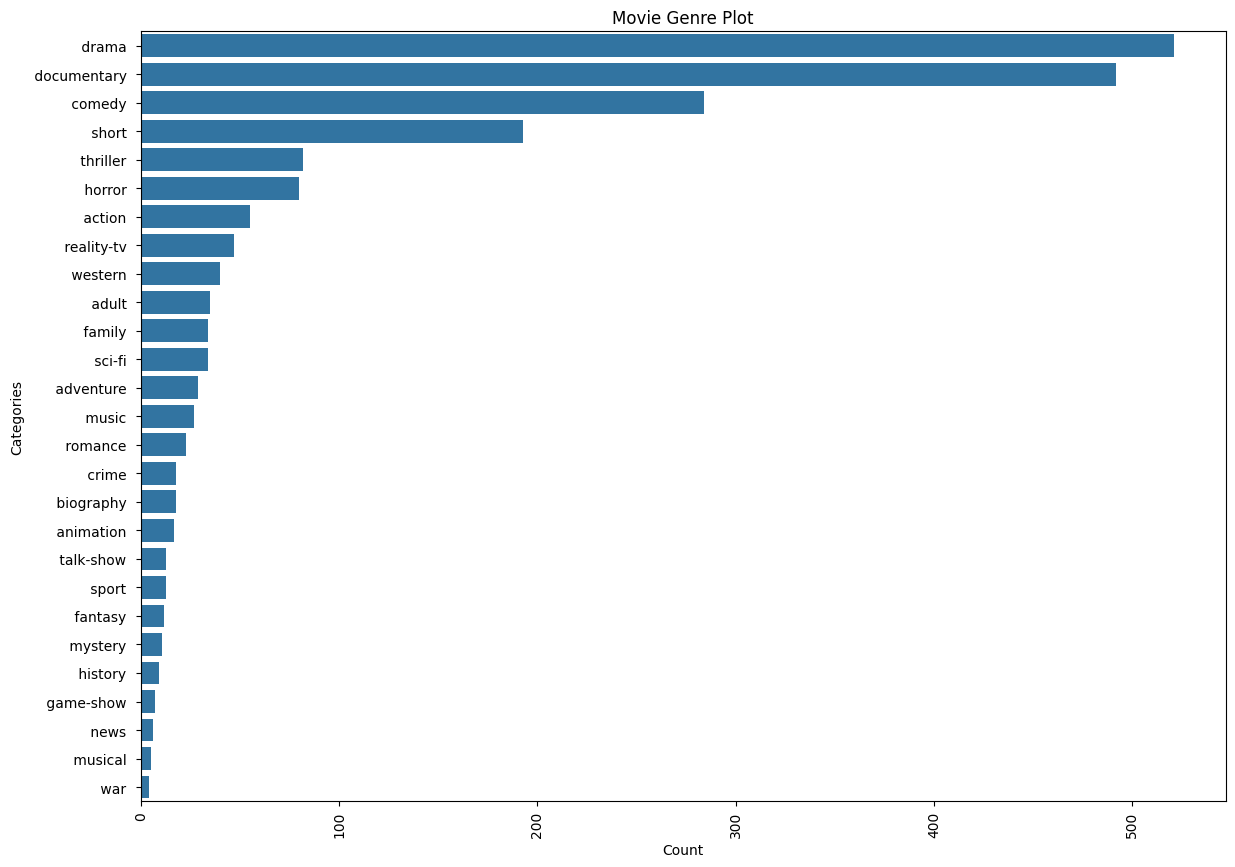

In [23]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

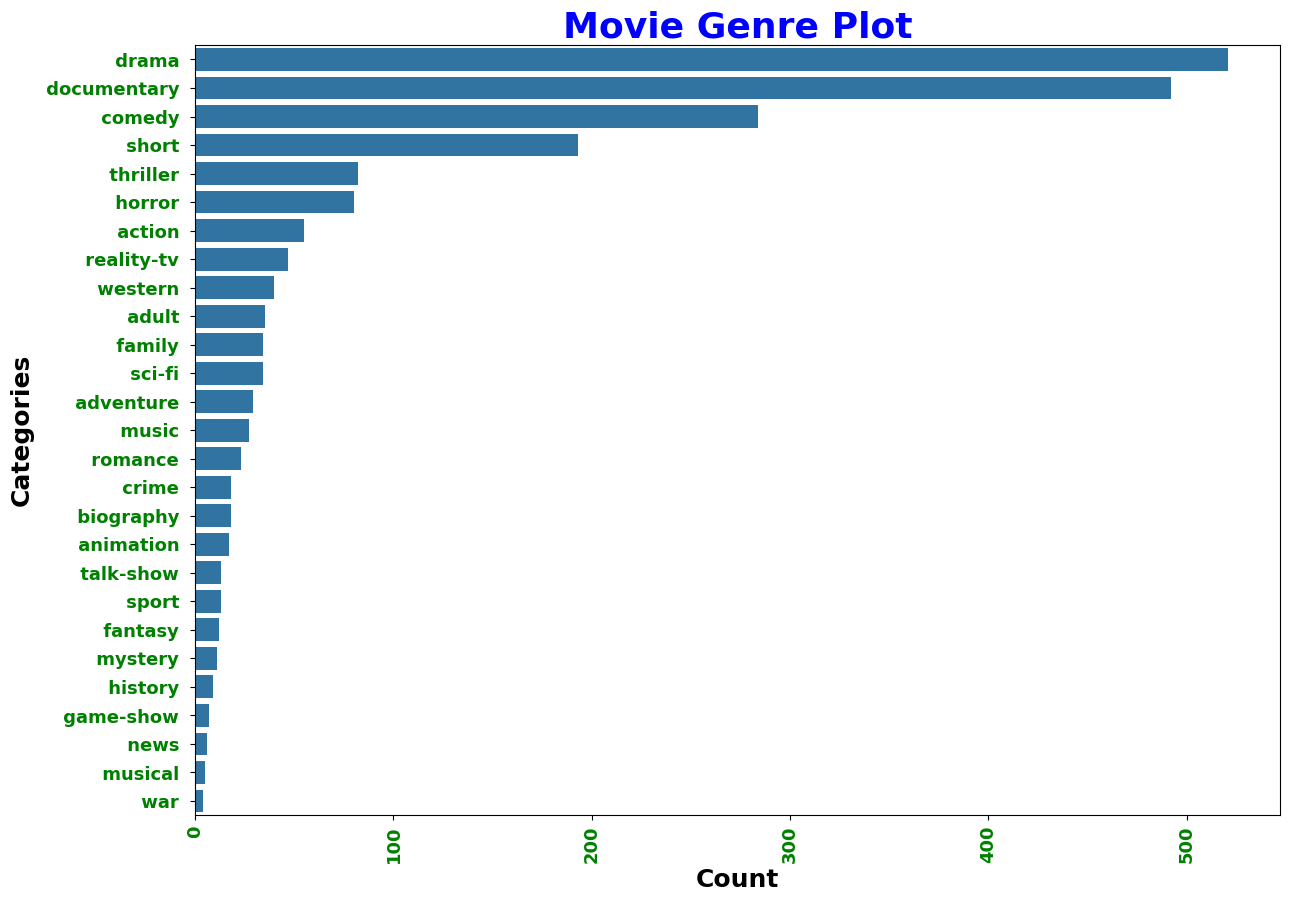

In [24]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 18, fontweight = 'bold')
plt.ylabel('Categories', fontsize = 18, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'green')
plt.show()

In [25]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [26]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [27]:
df_combined.shape

(5778, 4)

In [28]:
df_combined.size

23112

In [29]:
df_combined.isnull().any()

,0
SN,False
movie_name,False
category,True
confession,False


In [30]:
df_combined.count()

,0
SN,5778
movie_name,5778
category,2109
confession,5778


In [31]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [32]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [33]:
df_combined.head()

,SN,movie_name,category,confession
0,2,1661,24,A brother and sister with a past incestuous r...
1,3,5720,1,As the bus empties the students for their fie...
2,4,5103,8,To help their unemployed father make ends mee...
3,5,5172,8,The film's title refers not only to the un-re...
4,6,3896,7,Quality Control consists of a series of 16mm ...


In [34]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [35]:
df_combined.count()

,0
SN,5778
movie_name,5778
category,5778
confession,5778


In [36]:
df_combined.duplicated().values.any()

False

In [37]:
vectorizer = TfidfVectorizer()

In [38]:
X = vectorizer.fit_transform(df_combined["confession"])

In [39]:
df_combined.head()

,SN,movie_name,category,confession
0,2,1661,24,A brother and sister with a past incestuous r...
1,3,5720,1,As the bus empties the students for their fie...
2,4,5103,8,To help their unemployed father make ends mee...
3,5,5172,8,The film's title refers not only to the un-re...
4,6,3896,7,Quality Control consists of a series of 16mm ...


In [40]:
y = df_combined["category"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
naive_bayes_model = MultinomialNB()

In [43]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [44]:
nb_predictions = naive_bayes_model.predict(X_test)

In [45]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  58]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  94]
 [  0   0   0   0   0   0   0   0   0   0   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
logistic_regression_model = LogisticRegression()

In [47]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
lr_predictions = logistic_regression_model.predict(X_test)

In [49]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  58]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  94]
 [  0   0   0   0   0   0   0   0   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
